# Computer Vision - Plant Seedlings Image Classification Project

##### Elige Grant
##### June 2021

## Background and Context
Can you differentiate a weed from a crop seedling? The ability to do so effectively can mean better crop yields and better stewardship of the environment. The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has recently released a dataset containing images of unique plants belonging to 12 species at several growth stages

## Objective
You are provided with a dataset of images of plant seedlings at various stages of grown. Each image has a filename that is its unique id. The dataset comprises 12 plant species. The goal of the project is to create a classifier capable of determining a plant's species from a photo.

## Data Description
The dataset was download from Olympus.
The data file names are:
 * images.npy
 * Labels.csv

The original files are from Kaggle. Due to the large volume of data, the images were converted to images.npy file and the labels are also put into the Labels.csv. so that participants can work on the data/project seamlessly without worrying about the high data volume.


From kaggle:

https://www.kaggle.com/c/plant-seedlings-classification/data

You are provided with a training set and a test set of images of plant seedlings at various stages of grown. Each image has a filename that is its unique id. The dataset comprises 12 plant species. The goal of the competition is to create a classifier capable of determining a plant's species from a photo. The list of species is as follows:

 * Black-grass
 * Charlock
 * Cleavers
 * Common Chickweed
 * Common wheat
 * Fat Hen
 * Loose Silky-bent
 * Maize
 * Scentless Mayweed
 * Shepherds Purse
 * Small-flowered Cranesbill
 * Sugar beet

## 1. Import the libraries, load dataset, print shape of data, visualize the images in dataset. (5 Marks)


In [1]:
# Import necessary modules.

import warnings
warnings.filterwarnings("ignore")

#let us start by importing the relevant libraries

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import cv2

import sklearn     
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix

import scipy
from scipy.signal import convolve2d               # Convolve two 3-dimensional arrays.

# Tensorflow Libraries
import tensorflow as tf
import keras
from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from google.colab.patches import cv2_imshow

In [2]:
  #mouting the drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
#Defining the path of the dataset
project_path = '/content/drive/My Drive/Colab Notebooks/'
images_file = project_path + 'images.npy'
labels_file = project_path + 'Labels.csv'

In [4]:
#reading the images dataset
images_dataset = np.load(images_file, encoding='bytes')

In [5]:
# Shape of images dataset
images_dataset.shape

(4750, 128, 128, 3)

In [6]:
#reading the labels dataset
labels_df = pd.read_csv(labels_file)

In [7]:
labels_df

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill
...,...
4745,Loose Silky-bent
4746,Loose Silky-bent
4747,Loose Silky-bent
4748,Loose Silky-bent


In [8]:
# Add ID number to each Label
label_dict =  {'Black-grass':0, 'Charlock':1, 'Cleavers':2, 'Common Chickweed':3, 'Common wheat':4, 'Fat Hen':5, 'Loose Silky-bent':6, 'Maize':7, 'Scentless Mayweed':8, 'Shepherds Purse':9,'Small-flowered Cranesbill':10,'Sugar beet':11}
labels_df['Label_ID']= labels_df['Label'].map(label_dict)
labels_df

,Label,Label_ID
0,Small-flowered Cranesbill,10
1,Small-flowered Cranesbill,10
2,Small-flowered Cranesbill,10
3,Small-flowered Cranesbill,10
4,Small-flowered Cranesbill,10
...,...,...
4745,Loose Silky-bent,6
4746,Loose Silky-bent,6
4747,Loose Silky-bent,6
4748,Loose Silky-bent,6


Labeled Plant Name: Small-flowered Cranesbill
Labeled Plant ID: 10


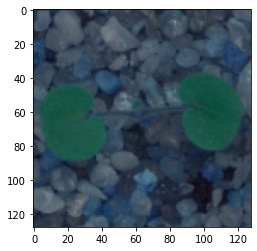

Labeled Plant Name: Common Chickweed
Labeled Plant ID: 3


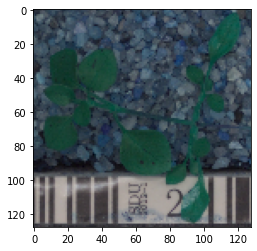

Labeled Plant Name: Scentless Mayweed
Labeled Plant ID: 8


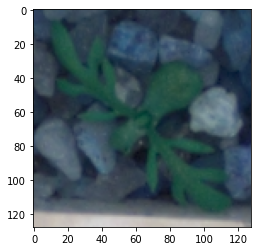

Labeled Plant Name: Loose Silky-bent
Labeled Plant ID: 6


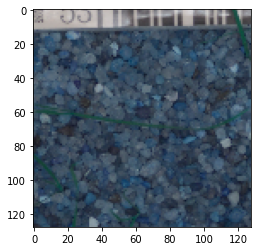

In [9]:
# Print a few examples
for i in range(0, 4750, 1500):
  image = images_dataset[i]
  label = labels_df.loc[i]['Label']
  id = labels_df.loc[i]['Label_ID']

  print(f'Labeled Plant Name: {label}')
  print(f'Labeled Plant ID: {id}')
  plt.imshow(image);
  plt.show()

Test blurring:

Labeled Plant Name: Small-flowered Cranesbill
Labeled Plant ID: 10


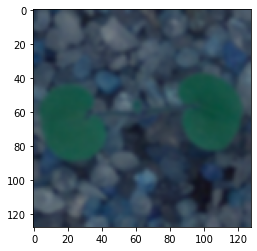

Labeled Plant Name: Common Chickweed
Labeled Plant ID: 3


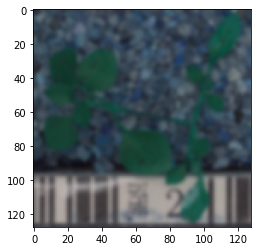

Labeled Plant Name: Scentless Mayweed
Labeled Plant ID: 8


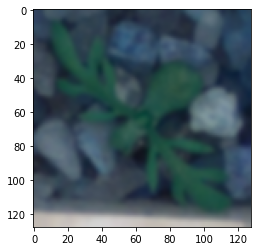

Labeled Plant Name: Loose Silky-bent
Labeled Plant ID: 6


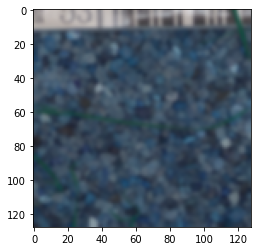

In [10]:
# Print a few examples
for i in range(0, 4750, 1500):
  image = images_dataset[i]
  blurred_image =  cv2.GaussianBlur(image, (5, 5), 0)
  label = labels_df.loc[i]['Label']
  id = labels_df.loc[i]['Label_ID']

  print(f'Labeled Plant Name: {label}')
  print(f'Labeled Plant ID: {id}')
  plt.imshow(blurred_image);
  plt.show()

In [11]:
def perc_on_bar(feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    #Creating a countplot for the feature
    sns.set(rc={'figure.figsize':(25,7)})
    ax=sns.countplot(x=feature, data=labels_df)
    
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.25 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 14) # annotate the percantage 
        
    plt.show() # show the plot

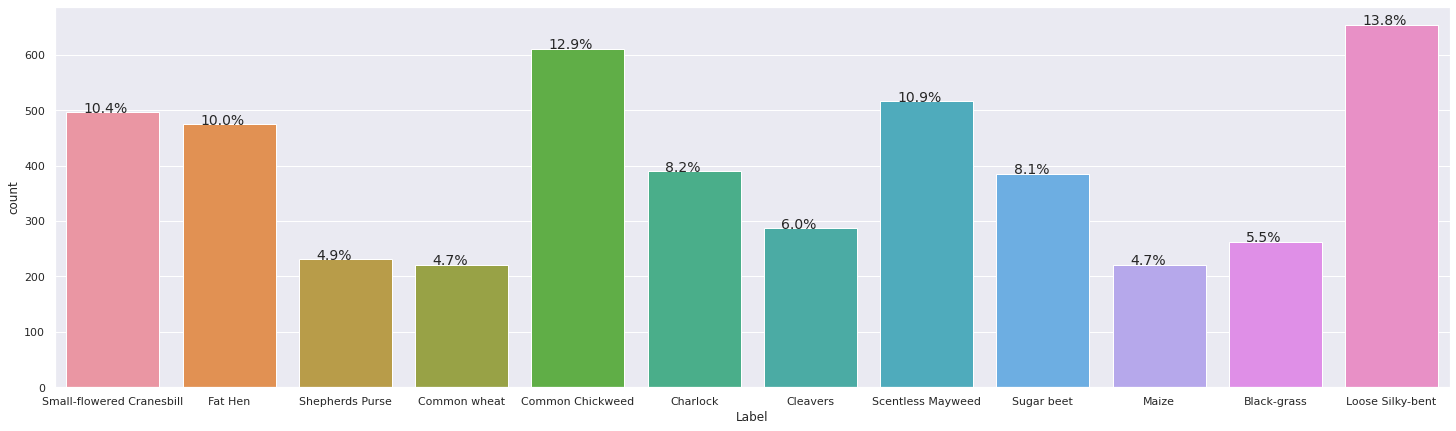

In [12]:
# Geography
perc_on_bar(labels_df['Label'])

 - The example photos seem to indicate that most plants are grown in soil covered by small rocks. It is unclear how this will hurt/help the modeling - especially since there is at least 1 plant where the "leaves" are barely visibile (e.g., Loose-silky bent). Will this plant be identified if shown just a pile of pebbles?
 - There is a pretty un-even distribution of pictures for each of the 12 plants ranging from ~5 percent up to ~14 percent of the total number of pictures

## 2. Data Pre-processing: (15 Marks)

 a. Normalization.

 b. Gaussian Blurring.

 c. Visualize data after pre-processing.

### Normalize Images (by 255)

In [13]:
images_dataset = images_dataset.astype('float32')
images_dataset /= 255.0

### Apply Gaussian Blurring to entire image dataset

In [14]:
blurred_images_dataset = np.empty((images_dataset.shape[0],128,128,3 ))
for i in range(0, images_dataset.shape[0]):
  image = images_dataset[i]
  blurred_images_dataset[i] = cv2.GaussianBlur(image, (5, 5), 0)

### Visualize A few Examples

Labeled Plant Name: Loose Silky-bent
Labeled Plant ID: 6


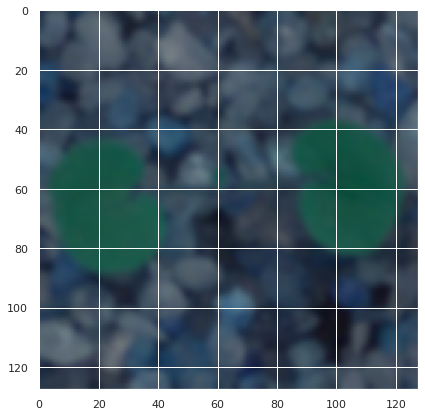

Labeled Plant Name: Loose Silky-bent
Labeled Plant ID: 6


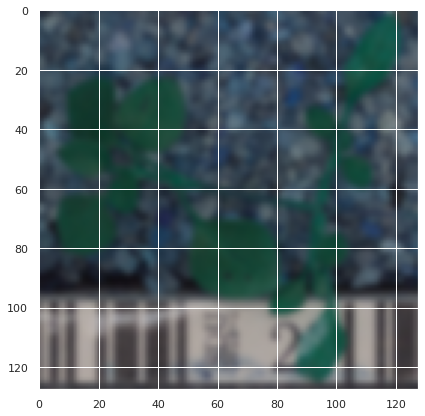

Labeled Plant Name: Loose Silky-bent
Labeled Plant ID: 6


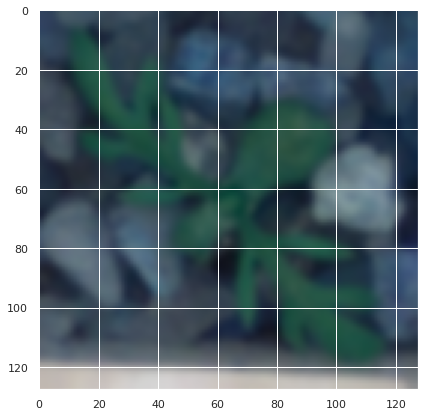

Labeled Plant Name: Loose Silky-bent
Labeled Plant ID: 6


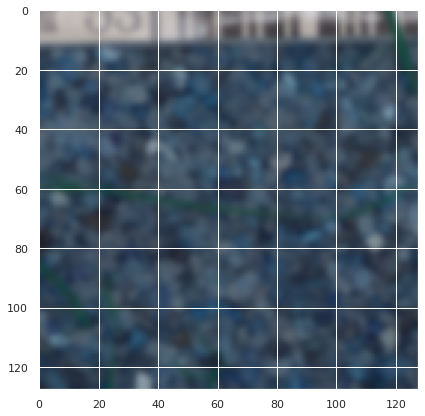

In [15]:
# Print a few examples
for i in range(0, 4750, 1500):
  blurred_image = blurred_images_dataset[i]

  print(f'Labeled Plant Name: {label}')
  print(f'Labeled Plant ID: {id}')
  plt.imshow(blurred_image);
  plt.show()

## 3. Make data compatible: (10 Marks)

 a. Convert labels to one-hot-vectors.
 
 b. Print the label for y_train[0].
 
 c. Split the dataset into training,testing, and validation set.(Hint: First split images andlabels into training and testing set with test_size = 0.3. Then further split test data into test and validation set with test_size = 0.5)
 
 d. Check  the  shape  of  data, Reshape  data  into  shapes compatible with Keras models if it’s not already. If it’s already in the compatible shape, then comment in the notebook that it’s already in compatible shape.

### Convert labels into one-hot-vectors

In [16]:
# Create numpy array from panadas datafram
id_np = labels_df['Label_ID'].to_numpy()

# Use LabelBinarizer to perform one-hot-encoding
enc = LabelBinarizer()
y = enc.fit_transform(id_np)

#Print y.shape
y.shape

(4750, 12)

In [17]:
# Display first element of the numpy array converted from the Label_ID column from the pandas dataframe
id_np[0]

10

In [18]:
# Display the one-hot-encoding representation of the Label_ID above
y[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

### Split the data into Train, Test, and Validation 

In [19]:
#Splitting the training and test set
X_train, X_test, y_train, y_test = train_test_split(blurred_images_dataset, y, test_size=0.30, random_state=1,stratify=y)
#Splitting the train set into  dev set and training set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.50, random_state=1,stratify=y_train)

In [20]:
# Label for y_train[0]
y_train[0]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Check the shape of the Test, Train, Val data

In [21]:
print(X_test.shape)
print(y_test.shape)

(1425, 128, 128, 3)
(1425, 12)


In [22]:
print(X_train.shape)
print(y_train.shape)

(1662, 128, 128, 3)
(1662, 12)


In [23]:
print(X_val.shape)
print(y_val.shape)

(1663, 128, 128, 3)
(1663, 12)


#### Data appears to be in a compatible shape!

## 4. Building CNN: (15 Marks)

 a. Define layers.

 b. Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)

In [24]:
# Set the CNN model

# Set the batch size, number of epochs.
batch_size = 128
num_classes = 12
epochs = 300
num_predictions = 20

model = models.Sequential()
model.add(layers.Conv2D(64, (5, 5), padding='same', activation="relu", input_shape=X_train.shape[1:]))
#model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(64, (5, 5), padding='same', activation="relu"))
#model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
#model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
#model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.1))

model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation="softmax"))

In [25]:
# initiate Adam optimizer
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [26]:
# Let's train the model using categorical_crossentropy
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
             # metrics=[tf.keras.metrics.Recall()])

In [27]:
# Network structure is summarized which confirms our design was implemented correctly.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        3

In [28]:
#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs


early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=20)



## 5. Fit and evaluate model and print confusion matrix. (10 Marks)

Epoch 1/300
13/13 [==============================] - 5s 184ms/step - loss: 2.4756 - accuracy: 0.0993 - val_loss: 2.4673 - val_accuracy: 0.2093
Epoch 2/300
13/13 [==============================] - 1s 64ms/step - loss: 2.4180 - accuracy: 0.1625 - val_loss: 2.3941 - val_accuracy: 0.2387
Epoch 3/300
13/13 [==============================] - 1s 63ms/step - loss: 2.3224 - accuracy: 0.2118 - val_loss: 2.3017 - val_accuracy: 0.2195
Epoch 4/300
13/13 [==============================] - 1s 64ms/step - loss: 2.2654 - accuracy: 0.2377 - val_loss: 2.2193 - val_accuracy: 0.2706
Epoch 5/300
13/13 [==============================] - 1s 63ms/step - loss: 2.1788 - accuracy: 0.2389 - val_loss: 2.1772 - val_accuracy: 0.2898
Epoch 6/300
13/13 [==============================] - 1s 64ms/step - loss: 2.1363 - accuracy: 0.2401 - val_loss: 2.1574 - val_accuracy: 0.2928
Epoch 7/300
13/13 [==============================] - 1s 65ms/step - loss: 2.0969 - accuracy: 0.2756 - val_loss: 2.0610 - val_accuracy: 0.3265
Epoch

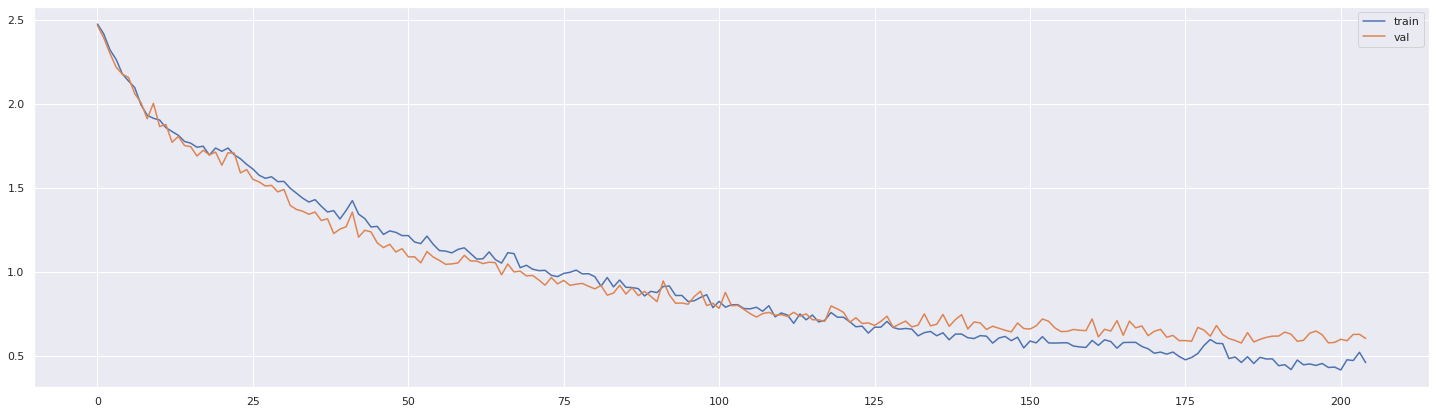

In [29]:
history = model.fit(X_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_val, y_val),
                    shuffle=True,
                    verbose=1,
                    callbacks=[early_stopping])

# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [30]:
# Create Predictions to compare against Test data
y_pred = model.predict_classes(X_test)
y_pred

array([ 6, 11,  6, ...,  6,  3,  5])

In [31]:
# Convert the one-hot-encoded labels from Test dataset to Index numbers 
y_test_id = np.argmax(y_test,axis=1)
y_test_id

array([ 0, 11,  0, ...,  6,  3,  5])

In [32]:
# Score trained model.
scores = model.evaluate(X_test, y_test, verbose=1)
print("=== Model Scores ===")
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

45/45 [==============================] - 0s 7ms/step - loss: 0.6344 - accuracy: 0.8049
=== Model Scores ===
Test loss: 0.6343696713447571
Test accuracy: 0.804912269115448


In [33]:
print("=== Confusion Matrix ===")
cm = confusion_matrix(y_test_id, y_pred)
print(cm)

=== Confusion Matrix ===
[[ 12   0   0   0   6   2  57   0   0   0   0   2]
 [  0 107   3   0   0   0   0   0   1   1   4   1]
 [  0  14  65   1   1   1   0   1   1   0   2   0]
 [  0   0   0 164   0   0   0   0   8   3   8   0]
 [  2   1   1   0  50   2   3   0   5   0   0   2]
 [  0   0   1   2   0 119   5   0   2   2  11   1]
 [ 14   0   0   0   3   2 171   1   5   0   0   0]
 [  0   2   0   1   0   0   0  43   9   2   0   9]
 [  0  12   0   2   0   1   2   1 133   3   0   1]
 [  0   2   0   2   0   1   0   1  17  39   5   2]
 [  0   1   0   0   1   2   0   0   0   2 143   0]
 [  0   6   0   0   0   0   0   1   8   0   0 101]]


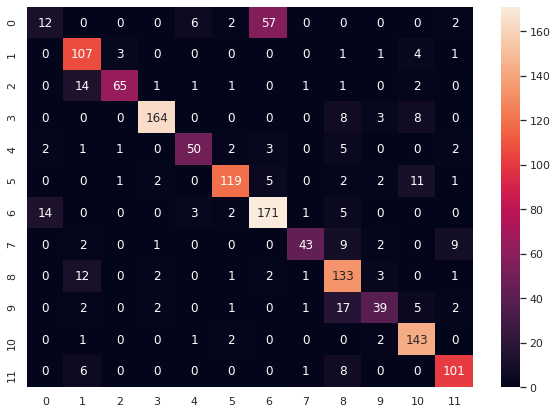

In [34]:
df_cm = pd.DataFrame(cm, index = [i for i in range(0,12)],
                     columns = [i for i in range(0,12)])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='d')

In [35]:
print("=== Classification Report ===")
print(classification_report(y_test_id, y_pred))

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.43      0.15      0.22        79
           1       0.74      0.91      0.82       117
           2       0.93      0.76      0.83        86
           3       0.95      0.90      0.92       183
           4       0.82      0.76      0.79        66
           5       0.92      0.83      0.87       143
           6       0.72      0.87      0.79       196
           7       0.90      0.65      0.75        66
           8       0.70      0.86      0.77       155
           9       0.75      0.57      0.64        69
          10       0.83      0.96      0.89       149
          11       0.85      0.87      0.86       116

    accuracy                           0.80      1425
   macro avg       0.79      0.76      0.76      1425
weighted avg       0.80      0.80      0.79      1425



## 6. Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]. (5 Marks)

In [36]:

id_dict =  {0:'Black-grass', 1:'Charlock', 2:'Cleavers', 3:'Common Chickweed', 4:'Common wheat', 5:'Fat Hen', 6:'Loose Silky-bent', 7:'Maize', 8:'Scentless Mayweed', 9:'Shepherds Purse', 10:'Small-flowered Cranesbill',11:'Sugar beet'}

Labeled Plant Name: Black-grass
Labeled Plant ID: 0
Predicted Plant Name: Loose Silky-bent
Predicted Plant ID: 6


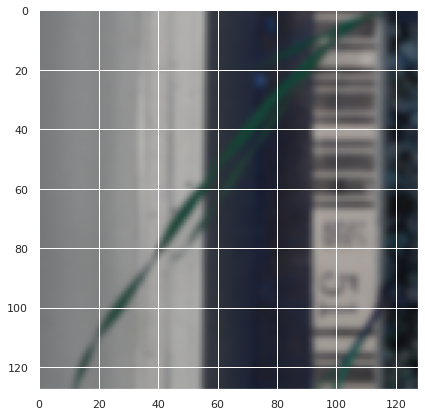

Labeled Plant Name: Sugar beet
Labeled Plant ID: 11
Predicted Plant Name: Sugar beet
Predicted Plant ID: 11


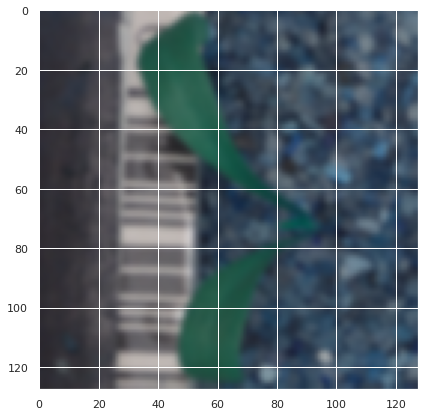

Labeled Plant Name: Common wheat
Labeled Plant ID: 4
Predicted Plant Name: Loose Silky-bent
Predicted Plant ID: 6


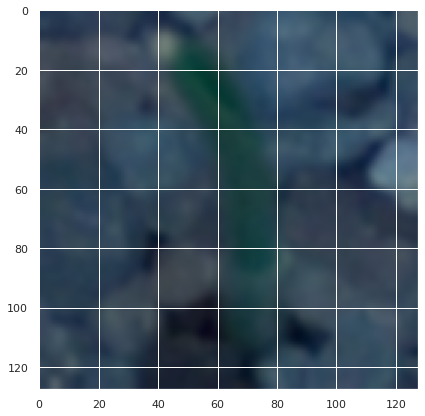

Labeled Plant Name: Loose Silky-bent
Labeled Plant ID: 6
Predicted Plant Name: Loose Silky-bent
Predicted Plant ID: 6


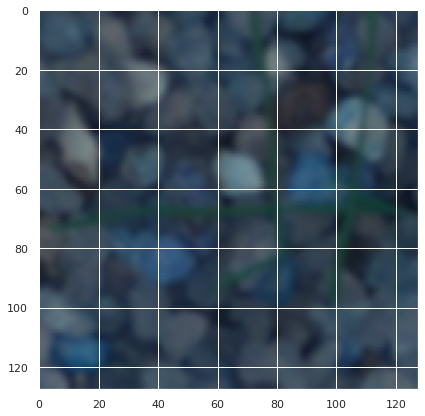

Labeled Plant Name: Black-grass
Labeled Plant ID: 0
Predicted Plant Name: Loose Silky-bent
Predicted Plant ID: 6


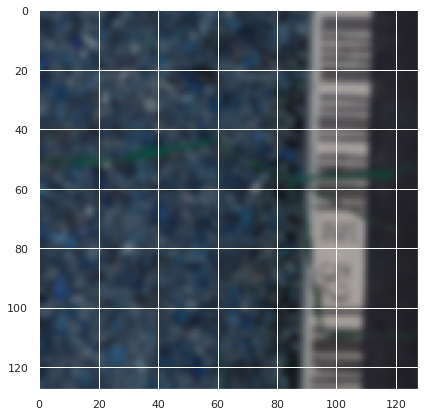

In [37]:
# Print a few examples
for i in [2,3,33,36,59]:
  test_image = X_test[i]

  print(f'Labeled Plant Name: {id_dict[y_test_id[i]]}')
  print(f'Labeled Plant ID: {y_test_id[i]}')
  print(f'Predicted Plant Name: {id_dict[y_pred[i]]}')
  print(f'Predicted Plant ID: {y_pred[i]}')
  plt.imshow(test_image);
  plt.show()

### Summary

 * The CNN tended to struggle with identifying "Black-grass" (ID #0) vs. "Loose Silky-bent" (ID #6) - sometimes it did a good job, but more often than not it did not. 
 * Adding "Batch Normalization" seemed to create a lot of instability in the modeled result - when comparing the train and val accuracy scores throughout the modeling process - after removing this layer the accuracy/loss scores were much more consistent between the train and val datasets
 * Blurring the data seemed to improve modeling only a slight bit - the photos are of fairly low resolution/quality already, so it isn't too surprising. Stuck with a 5x5 Gaussian blur
 * Early stopping and Drop out layers appears to be critical for creating models that produce nearly identical scores for train, val, and test datasets - without early stopping and drop out layers the model tends to overfit
 * Max pooling must be performed - without these layers the train and val evaluation metrics are very different (and low!). Run times are also much longer
 * Larger batch sizes appear to help keep scores consistent among the train, val, and test datasets - although convergence is a bit slower
 * Overall, the best accuracy scores (in terms of being consistent across the train, val, and ultimately test datasets) appears to be in the low 80% range for the CNN parameters tested here